### *“At the end of the day, we can endure much more than we think we can.”* 
*-Frida Kahlo, 20th-century Mexican painter*

----

YOUR NAME HERE: Daniel DeLuca

----

# Lab L: Bar Graphs and the Basics of value_counts/groupby 

### Use the cheat sheet posted in Blackboard to help guide you if you forget syntax!!!

---

Begin by importing the new plotting package below.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    

### Visualizing Categorical Distributions ###

Data come in many forms that are not numerical. Data can be pieces of music, or places on a map. They can also be categories into which you can place individuals. Here are some examples of *categorical* variables.

- The individuals are cartons of ice-cream, and the variable is the flavor in the carton.
- The individuals are professional basketball players, and the variable is the player's team.
- The individuals are years, and the variable is the genre of the highest grossing movie of the year.
- The individuals are survey respondents, and the variable is the response they choose from among "Not at all satisfied," "Somewhat satisfied," and "Very satisfied."

The table `icecream` contains data on 30 cartons of ice-cream. 

In [3]:
icecream_dict = {'Flavor' : np.array(['Chocolate', 'Strawberry', 'Vanilla']),
                 'Number of Cartons' : np.array([16, 5, 9])}

icecream = pd.DataFrame(icecream_dict)
icecream

,Flavor,Number of Cartons
0,Chocolate,16
1,Strawberry,5
2,Vanilla,9


The *values* of the categorical variable "flavor" are chocolate, strawberry, and vanilla. The table shows the number of cartons of each flavor. We call this a *distribution table*. A *distribution* shows all the values of a variable, along with the frequency of each one.

### Bar Chart ###
The bar chart is a familiar way of visualizing categorical distributions. It displays a bar for each category. The bars are equally spaced and equally wide. The length of each bar is proportional to the frequency of the corresponding category.

The `bar` method from the `plt` package takes two arguments: the first is the column label of the categories, and the second is the column label of the frequencies.

In [ ]:
plt.bar(icecream['Flavor'], icecream['Number of Cartons'])
plt.ylabel('Number of Cartons')
plt.title('Cartons per Flavor')

KeyError: 'Number of Cartons'

We will often draw bar charts with horizontal bars because it's easier to label the bars that way. The method to use here is called `barh` and it takes the same input as `bar`.

In [31]:
plt.barh(icecream['Flavor'], icecream['Number of Cartons'])
plt.xlabel('Number of Cartons')
plt.title('Cartons per Flavor')

KeyError: 'Number of Cartons'

### Features of Categorical Distributions ###
Apart from purely visual differences, there is an important fundamental distinction between bar charts and the two graphs that we saw in the previous sections. Those were the scatter plot and the line plot, both of which display two numerical variables – the variables on both axes are numerical. **In contrast, the bar chart has categories on one axis and numerical frequencies on the other.**

This has consequences for the chart. First, the width of each bar and the space between consecutive bars is entirely up to the person who is producing the graph, or to the program being used to produce it. Python made those choices for us. If you were to draw the bar graph by hand, you could make completely different choices and still have a perfectly correct bar graph, provided you drew all the bars with the same width and kept all the spaces the same.

**Most importantly, the bars can be drawn in any order.** The categories "chocolate," "vanilla," and "strawberry" have no universal rank order, unlike for example the numbers 5, 7, and 10.

This means that we can draw a bar chart that is easier to interpret, by rearranging the bars in decreasing order. To do this, we first rearrange the rows of `icecream` in decreasing order of `Number of Cartons`, and then draw the bar chart.

---

# **Question 1**

A) Sort the icecream chart so that it is ascending in its number of cartons


#Hello Im going to assume you meant descending and not ascending because the next problem asked for descending :)

In [6]:
#sort here
icecream = icecream.sort_values('Number of Cartons' , ascending = False)
icecream  

,Flavor,Number of Cartons
0,Chocolate,16
2,Vanilla,9
1,Strawberry,5


B) Now redraw the barchart (using the `bar` command) so that from left to right the flavors are in descending order,ie, Chocolate before Vanilla before Strawberry

<BarContainer object of 3 artists>

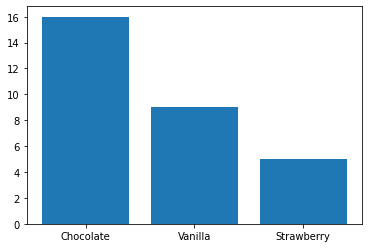

In [7]:
plt.bar(icecream["Flavor"] , icecream["Number of Cartons"])

C) Finally, redraw the horizontal barchart (using the `barh` command) so that from top to bottom the flavors are in descending order,ie, Chocolate above Vanilla above Strawberry

<BarContainer object of 3 artists>

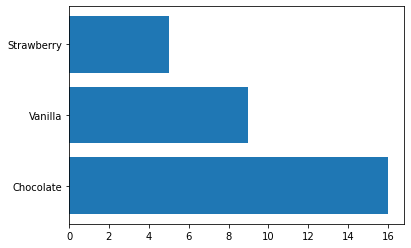

In [8]:
plt.barh(icecream["Flavor"] , icecream["Number of Cartons"])


---

### Rule of Thumb:  Always sort the categories in a bar chart.  

The sorted bar charts in the previous question contains exactly the same information as before, but it is a little easier to read. While this is not a huge gain in reading a chart with just three bars, it can be quite significant when the number of categories is large.

So always sort the categories in a bar chart. The only exception is when there is a natural ordering on the x axis.  For example, below, the categories are years and it is natural to show years from earliest to latest.

![shark-bar-chart](https://github.com/kathleen-ryan-DeSales/CS250/blob/main/pictures/shark_barchart.png?raw=true)



---
### Grouping Categorical Data ###

Let's reconsideer the ice cream data.

To construct the table `icecream`, someone had to look at all 30 cartons of ice-cream and count the number of each flavor. But if our data does not already include frequencies, we have to compute the frequencies before we can draw a bar chart.   So below we just have a table of the flavor preferences of 30 folks and need to find the frequencies of each.

In [9]:
icecream = pd.read_csv("ice_cream.csv")
icecream.head(10)

,Flavor
0,Chocolate
1,Vanilla
2,Chocolate
3,Chocolate
4,Chocolate
5,Chocolate
6,Chocolate
7,Chocolate
8,Chocolate
9,Vanilla


One way to quickly get the counts of a category is ``value_counts`` on a column.  This function looks at all the categories that appear in a column and count each category's frequency.  For example, in the code cell below, we are asking python to look at each category in the ``Flavor`` column (So Chocolate, Vanilla, Strawberry) and total the number in each.

In [10]:
icecream ["Flavor"].value_counts()

Chocolate     16
Vanilla        9
Strawberry     5
Name: Flavor, dtype: int64

We can actually use the output of the ``value_counts`` to create a bar chart.  

 * STEP 1: First use ``value_counts`` to get the counts.
 * STEP 2: Use ``pd.DataFrame(...)`` to convert the result to a dataframe. 
 * STEP 3: Make the bar chart as before!  
 

**HELPFUL HINT**: When creating the dataframe, the indices will not be 0, 1, 2, 3, etc., but rather, the indices will be the categories.  To access the index "column" when creating the bar graph, you can use ``.index`` after the name of the dataframe. We'll demo this now.

In [11]:
#STEP 1 Save the output of value_counts - THe index will be the categories
flavor_counts = icecream ["Flavor"].value_counts()
flavor_counts

Chocolate     16
Vanilla        9
Strawberry     5
Name: Flavor, dtype: int64

In [12]:
#STEP 2  Convert to a dataframe
flavor_df  = pd.DataFrame(flavor_counts)
flavor_df

,Flavor
Chocolate,16
Vanilla,9
Strawberry,5


Or if you prefer use ``to_frame`` to do the conversion.

In [13]:
flavor_df  = flavor_counts.to_frame()
flavor_df

,Flavor
Chocolate,16
Vanilla,9
Strawberry,5


Text(0.5, 1.0, 'Cartons per Flavor')

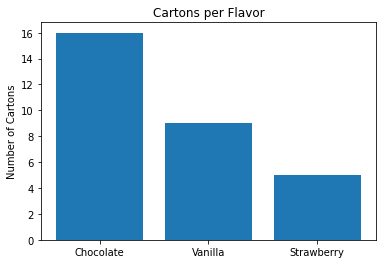

In [14]:
#STEP 3 Bar chart using the indices as the categories
#Notice we use flavor_df.index to access the categories of Chocolate, Vanila, and Strawberry here!
plt.bar(flavor_df.index, flavor_df["Flavor"])
plt.ylabel('Number of Cartons')
plt.title('Cartons per Flavor')

---

For the next question, we'll use these 2 columns from the partner perferences survey that I gave you in class:

 * "Partner_Preference":  Would you like a partner for the final project? 
 * "Python_Feeling":  Rate how you are feeling with Python  (1-5 with 5 meaning you feel very strong.)

In [15]:
responses = pd.read_csv("partner_preferences.csv")
responses

,Partner_Preference,Python_Feeling
0,Yes,5
1,No preference,5
2,Yes,3
3,Yes,2
4,Yes,4
5,Yes,4
6,Yes,3
7,Yes,3
8,Yes,4
9,Yes,2


---

# **Question 2**

A) STEP 1:  Use value_counts to get a count of how many people rated their feeling with Python as a 1, 2, 3, 4, 5.

HINT:  IF your output includes partner_preference, then its because you did not apply ``value_counts`` to a single column.

In [16]:
python_counts = responses["Python_Feeling"].value_counts()
python_counts


3    5
5    4
4    4
2    3
Name: Python_Feeling, dtype: int64

B) ASIDE: Notice no one opted to choose a "1", so we can add a count of 0 for "1" to our table.

To do this, we just insert a row with a label of 1 to have the value 0 to ``python_counts``.

In [17]:
#Fill in the ???s to set a row with label 1 to the value 0.
python_counts.loc[1] = 0
python_counts

3    5
5    4
4    4
2    3
1    0
Name: Python_Feeling, dtype: int64

C) Convert the ``python_counts`` (right now a series) to a dataframe.

In [18]:
#STEP 2:  Convert ``python_counts`` to a dataframe.

python_df = python_counts.to_frame()
python_df

,Python_Feeling
3,5
5,4
4,4
2,3
1,0


C) STEP 3:  Craete a bar chart for this data.  Use ``bar`` instead of ``barh`` here.

Be sure to:

 * Label the y axis with "Number of Students"
 * Give the graph a title of "Feeling with Python".

HINT:  Remember - To access the index "column" use ```.index```.

Text(0.5, 1.0, ' Feeling with Python')

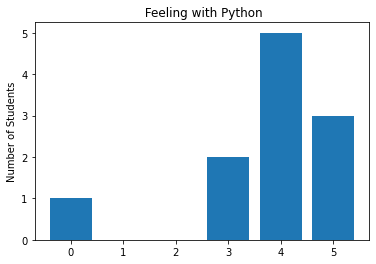

In [19]:
#STEP 3 Bar chart using the indices as the categories

plt.bar(python_df['Python_Feeling'] , python_df.index)
plt.ylabel('Number of Students')
plt.title(' Feeling with Python')

Notice how python sorted the categories on the x axis for you, since the categories (1,2,3,4,5)  were numerical.

---

# **Question 3**

Build this bar chart **EXACTLY**, including the ordering.

![partner-prefs-image](https://github.com/kathleen-ryan-DeSales/CS250/blob/main/pictures/partner_prefs.png?raw=true)

**HINT:**  

* The tough part will be ordering the bars as "Yes", then "No", then "No preference".  So first just create the bar chart without worrying about the x axis ordering. 
* Once you have the bar plot showing in the wrong order, create a new column called "order" with the desired order.  set the values in this column so that the "Yes" row has a 1, "No" has a 2, and "No preference" has a 3.  Then sort on the "order" column before making the bar chart.

In [20]:
responses['order'] = responses['Partner_Preference']

responses


,Partner_Preference,Python_Feeling,order
0,Yes,5,Yes
1,No preference,5,No preference
2,Yes,3,Yes
3,Yes,2,Yes
4,Yes,4,Yes
5,Yes,4,Yes
6,Yes,3,Yes
7,Yes,3,Yes
8,Yes,4,Yes
9,Yes,2,Yes


Text(0.5, 1.0, 'Partner Preference')

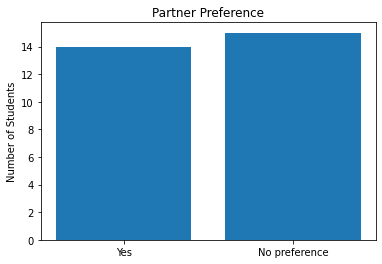

In [21]:
#Code here - Feel free to add more than one code cell if needed.  
#Remeber the 3 steps you were just shown!
plt.bar(responses['Partner_Preference'], responses.index)
plt.ylabel('Number of Students')
plt.title('Partner Preference')


---

### Group By

Notice what ``value_counts`` is really doing:

* It's **grouping the rows by the category** and then counting up the number of rows in each.

In the next class, we will instead use the ``groupby`` function to do this task because ``groupby`` is much more versatile, as we will see.  But let's get some basic practice now.

The basic syntax for ``groupby`` when you're just trying to tally the row categories is as follows:

* ```my_dataframe.groupby("Column Name").count()```

The above line of code groups together all rows with the same category/value within a column and then counts how many rows there are for each.

So for example, in the cell below, we group together all the rows that have the same ```"Python_Feeling"``` value and we count those rows.

In [22]:
responses.groupby("Python_Feeling").count()

,Partner_Preference,order
Python_Feeling,,
2,3,3
3,5,5
4,4,4
5,4,4


---

You might be wondering why there is a "Python_Preference" column above when we grouped by ``"Python_Feeling"``.  Python is telling you that there were 3 rows in the ``"Partner_Preference"`` column when you were done grouping the Feelings together.  Don't worry if that is confusing.  We'll get more practice soon.

---

# **Question 4**

Use ``groupby`` to group the responses dataframe by "Partner_Preference" and count how many rows fall in each category.  

As before, your answer should be a table with 2 rows where "No preference" has a count of 3 and "Yes" has a count of 13.

In [23]:
responses.groupby("Partner_Preference").count()

,Python_Feeling,order
Partner_Preference,,
No preference,3,3
Yes,13,13


---


Let's switch datasets for some more practice.

We are going to look at a data set about irises.  The iris data set consists of information about 3 different types of irises (0-Setosa, 1-Versicolour, and 2-Virginica), specifically their petal and sepal length.

![image.png](https://plantid.net/Classic/Glossary/Sepal_files/image001.png)


To generate this data set, 150 iris flowers were sampled and their Sepal Length, Sepal Width, Petal Length and Petal Width, all in centimeters, were recorded.

In [24]:
#Run this cell to generate the iris dataframe
from sklearn import datasets
iris = datasets.load_iris()

iris_df = pd.DataFrame()
iris_df["Type"] = iris["target"]
iris_df["sepal_length"] = iris["data"][:,0]
iris_df["sepal_width"] = iris["data"][:,1]
iris_df["petal_length"] = iris["data"][:,2]
iris_df["petal_width"] = iris["data"][:,3]

iris_df

,Type,sepal_length,sepal_width,petal_length,petal_width
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,2,6.7,3.0,5.2,2.3
146,2,6.3,2.5,5.0,1.9
147,2,6.5,3.0,5.2,2.0
148,2,6.2,3.4,5.4,2.3


---

# **Question 5**

Use groupby to get a table showing how many irises there are of each type (0-Setosa, 1-Versicolour, and 2-Virginica).  So get this table below.

**Be sure to rename the columns as shown.**


|          | **count** |
|---------:|-----------|
| **Type** |           |
|        0 |        50 |
|        1 |        50 |
|        2 |        50 |

In [25]:
 iris = iris_df.groupby("Type").count()
iris

,sepal_length,sepal_width,petal_length,petal_width
Type,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


In [26]:
iris = iris.rename(columns = {"sepal_length" : 'count'})



---

# **Question 6**

A) Use groupby to generate a table of the average sepal length/width and average petal length/width per type, as shown below.

Be sure to rename the columns as shown.

|          | **avg_sepal_length** | **avg_sepal_width** | **avg_petal_length** | **avg_petal_width** |
|---------:|-----------------:|----------------:|-----------------:|----------------:|
| **Type** |                  |                 |                  |                 |
|        0 |            5.006 |           3.428 |            1.462 |           0.246 |
|        1 |            5.936 |           2.770 |            4.260 |           1.326 |
|        2 |            6.588 |           2.974 |            5.552 |           2.026 |

In [27]:
iris_df.groupby('Type').mean()
iris_df = iris_df.rename(columns = {'sepal_length' : 'avg_sepal_length'})
iris_df = iris_df.rename(columns = {'sepal_width' : 'avg_sepal_width'})
iris_df = iris_df.rename(columns = {'petal_length' : 'avg_petal_length'})
iris_df = iris_df.rename(columns = {'petal_width' : 'avg_petal_width'})


B) Generate a bar graph showing the average_sepal_length per iris type.

**Be sure of course to sort the bars from highest to lowest and to label both axes and give a professional title.**

In [28]:
iris_df.sort_values('avg_sepal_length' , ascending = False)
iris_df.sort_values('avg_sepal_width' , ascending = False)
iris_df.sort_values('avg_petal_length' , ascending = False)
iris_df.sort_values('avg_petal_width' , ascending = False)

,Type,avg_sepal_length,avg_sepal_width,avg_petal_length,avg_petal_width
100,2,6.3,3.3,6.0,2.5
109,2,7.2,3.6,6.1,2.5
144,2,6.7,3.3,5.7,2.5
114,2,5.8,2.8,5.1,2.4
140,2,6.7,3.1,5.6,2.4
...,...,...,...,...,...
12,0,4.8,3.0,1.4,0.1
13,0,4.3,3.0,1.1,0.1
37,0,4.9,3.6,1.4,0.1
32,0,5.2,4.1,1.5,0.1


Text(0.5, 1.0, 'Avg_Sepal_Length based on Type')

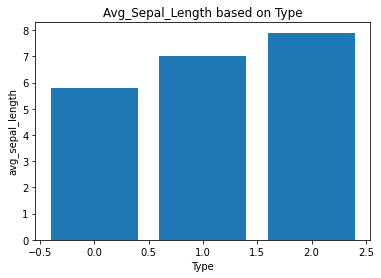

In [29]:
plt.bar(iris_df["Type"] , iris_df['avg_sepal_length'])
plt.xlabel("Type")
plt.ylabel("avg_sepal_length")
plt.title ("Avg_Sepal_Length based on Type")